<a href="https://colab.research.google.com/github/sameersahu473/comp1/blob/main/Copy_of_Ank_Cascade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c cascade-cup-22

sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip 

Archive:  /content/train.csv.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/train.csv.zip or
        /content/train.csv.zip.zip, and cannot find /content/train.csv.zip.ZIP, period.


In [ ]:
!unzip /content/test.csv.zip

Archive:  /content/test.csv.zip
  inflating: test.csv                


In [ ]:
!unzip /content/train.csv.zip

Archive:  /content/train.csv.zip
warning [/content/train.csv.zip]:  4088749 extra bytes at beginning or within zipfile
  (attempting to process anyway)
file #1:  bad zipfile offset (local header sig):  4088749
  (attempting to re-compensate)
  inflating: train.csv               
  error:  invalid compressed data to inflate
error: not enough memory for bomb detection


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df.isnull().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                157
pickup_time               2421
delivered_time            5218
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders           16948
delivered_orders         17341
cancelled                    0
undelivered_orders       17341
lifetime_order_count        53
reassignment_method     436256
reassignment_reason     436247
reassigned_order        436247
session_time              3675
cancelled_time          444782
dtype: int64

In [7]:
df = df.drop(columns=['order_id','pickup_time','delivered_time'],axis =1)

In [ ]:
df.head()

,order_time,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,2021-01-26 02:47:53,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,2021-01-26 03:06:30,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN


In [ ]:
df.isnull().sum()

order_time                   0
order_date                   0
allot_time                   0
accept_time                157
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders           16948
delivered_orders         17341
cancelled                    0
undelivered_orders       17341
lifetime_order_count        53
reassignment_method     436256
reassignment_reason     436247
reassigned_order        436247
session_time              3675
cancelled_time          444782
dtype: int64

In [ ]:
for col in df.columns:  
    dataTypeSeries = df[col].dtypes
    print('Data type of '+ col+ ' column of Dataframe :')
    print(dataTypeSeries)

Data type of order_time column of Dataframe :
object
Data type of order_date column of Dataframe :
object
Data type of allot_time column of Dataframe :
object
Data type of accept_time column of Dataframe :
object
Data type of rider_id column of Dataframe :
int64
Data type of first_mile_distance column of Dataframe :
float64
Data type of last_mile_distance column of Dataframe :
float64
Data type of alloted_orders column of Dataframe :
float64
Data type of delivered_orders column of Dataframe :
float64
Data type of cancelled column of Dataframe :
int64
Data type of undelivered_orders column of Dataframe :
float64
Data type of lifetime_order_count column of Dataframe :
float64
Data type of reassignment_method column of Dataframe :
object
Data type of reassignment_reason column of Dataframe :
object
Data type of reassigned_order column of Dataframe :
float64
Data type of session_time column of Dataframe :
float64
Data type of cancelled_time column of Dataframe :
object


In [8]:
#creating the datetime column
df['allot_time'] = pd.to_datetime(df['allot_time'].str.strip(), format='%Y/%m/%d %H:%M:%S')
df_test['allot_time'] = pd.to_datetime(df_test['allot_time'].str.strip(), format='%Y/%m/%d %H:%M:%S')

In [9]:
df['accept_time'] = pd.to_datetime(df['accept_time'].str.strip(), format='%Y/%m/%d %H:%M:%S')
df_test['accept_time'] = pd.to_datetime(df_test['accept_time'].str.strip(), format='%Y/%m/%d %H:%M:%S')

In [ ]:
for col in df.columns:  
    dataTypeSeries = df[col].dtypes
    print('Data type of '+ col+ ' column of Dataframe :')
    print(dataTypeSeries)

Data type of order_time column of Dataframe :
object
Data type of order_date column of Dataframe :
object
Data type of allot_time column of Dataframe :
datetime64[ns]
Data type of accept_time column of Dataframe :
datetime64[ns]
Data type of rider_id column of Dataframe :
int64
Data type of first_mile_distance column of Dataframe :
float64
Data type of last_mile_distance column of Dataframe :
float64
Data type of alloted_orders column of Dataframe :
float64
Data type of delivered_orders column of Dataframe :
float64
Data type of cancelled column of Dataframe :
int64
Data type of undelivered_orders column of Dataframe :
float64
Data type of lifetime_order_count column of Dataframe :
float64
Data type of reassignment_method column of Dataframe :
object
Data type of reassignment_reason column of Dataframe :
object
Data type of reassigned_order column of Dataframe :
float64
Data type of session_time column of Dataframe :
float64
Data type of cancelled_time column of Dataframe :
object


In [10]:
df['accept_to_allot'] = (df['accept_time'] - df['allot_time'])
df_test['accept_to_allot'] = (df_test['accept_time'] - df_test['allot_time'])

In [11]:
df['accept_sec'] = df[:450000]['accept_to_allot'].astype('timedelta64[s]')
df_test['accept_sec'] = df_test[:450000]['accept_to_allot'].astype('timedelta64[s]')

In [12]:
#creating the datetime column
df['order_time'] = pd.to_datetime(df['order_time'].str.strip(), format='%Y/%m/%d %H:%M:%S')
df_test['order_time'] = pd.to_datetime(df_test['order_time'].str.strip(), format='%Y/%m/%d %H:%M:%S')

In [13]:
df['order_to_allot'] = (df['accept_time'] - df['order_time'])
df_test['order_to_allot'] = (df_test['accept_time'] - df_test['order_time'])

In [14]:
df['order_sec'] = df[:450000]['order_to_allot'].astype('timedelta64[s]')
df_test['order_sec'] = df_test[:450000]['order_to_allot'].astype('timedelta64[s]')

In [ ]:
df.head()

,order_time,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time,accept_to_allot,accept_sec,order_to_allot,order_sec
0,2021-01-26 02:21:35,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:09,9.0,0 days 00:00:33,33.0
1,2021-01-26 02:33:16,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN,0 days 00:00:48,48.0,0 days 00:01:29,89.0
2,2021-01-26 02:39:49,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN,0 days 00:00:16,16.0,0 days 00:00:24,24.0
3,2021-01-26 02:47:53,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN,0 days 00:00:41,41.0,0 days 00:01:13,73.0
4,2021-01-26 03:06:30,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN,0 days 00:00:36,36.0,0 days 00:01:27,87.0


In [15]:
df['allot_sec'] = df['order_sec'] - df['accept_sec']
df_test['allot_sec'] = df_test['order_sec'] - df_test['accept_sec']

In [16]:
df_test = df_test.drop(['order_time','allot_time','accept_time','accept_to_allot','order_to_allot'],axis=1)
df= df.drop(['order_time','allot_time','accept_time','accept_to_allot','order_to_allot'],axis=1)

In [17]:
df['order_date'] = pd.to_datetime(df['order_date'].str.strip(), format='%Y/%m/%d %H:%M:%S')
df_test['order_date'] = pd.to_datetime(df_test['order_date'].str.strip(), format='%Y/%m/%d %H:%M:%S')

In [18]:
df['year'] = pd.DatetimeIndex(df['order_date']).year
df['month'] = pd.DatetimeIndex(df['order_date']).month


df_test['year'] = pd.DatetimeIndex(df_test['order_date']).year
df_test['month'] = pd.DatetimeIndex(df_test['order_date']).month

In [ ]:
df.head()

,order_date,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time,accept_sec,order_sec,allot_sec,year,month
0,2021-01-26,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN,9.0,33.0,24.0,2021,1
1,2021-01-26,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN,48.0,89.0,41.0,2021,1
2,2021-01-26,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN,16.0,24.0,8.0,2021,1
3,2021-01-26,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN,41.0,73.0,32.0,2021,1
4,2021-01-26,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN,36.0,87.0,51.0,2021,1


In [ ]:
df.columns

Index(['order_date', 'rider_id', 'first_mile_distance', 'last_mile_distance',
       'alloted_orders', 'delivered_orders', 'cancelled', 'undelivered_orders',
       'lifetime_order_count', 'reassignment_method', 'reassignment_reason',
       'reassigned_order', 'session_time', 'cancelled_time', 'accept_sec',
       'order_sec', 'allot_sec', 'year', 'month'],
      dtype='object')

In [ ]:
df['reassignment_reason'].value_counts()


Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket    7212
Reassignment Request from SE portal.                                            5300
Reassign                                                                        1241
Name: reassignment_reason, dtype: int64

In [ ]:
df_test['reassignment_reason'].value_counts()

Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket    2593
Reassignment Request from SE portal.                                            1582
Reassign                                                                         460
Name: reassignment_reason, dtype: int64

In [ ]:
df['reassignment_method'].value_counts()

auto      13383
manual      361
Name: reassignment_method, dtype: int64

In [ ]:
df_test['reassignment_method'].value_counts()

auto      4531
manual     101
Name: reassignment_method, dtype: int64

In [ ]:
df.dtypes

order_date              datetime64[ns]
rider_id                         int64
first_mile_distance            float64
last_mile_distance             float64
alloted_orders                 float64
delivered_orders               float64
cancelled                        int64
undelivered_orders             float64
lifetime_order_count           float64
reassignment_method             object
reassignment_reason             object
reassigned_order               float64
session_time                   float64
cancelled_time                  object
accept_sec                     float64
order_sec                      float64
allot_sec                      float64
year                             int64
month                            int64
dtype: object

In [19]:
num_col = [c for i, c in enumerate(df.columns) if df.dtypes[i] in [np.int, np.float]]
len(num_col)

15

In [20]:
num_col = [c for i, c in enumerate(df.columns) if df.dtypes[i] in [np.object]]
len(num_col)

3

In [ ]:
df.isnull().sum()

order_date                   0
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders           16948
delivered_orders         17341
cancelled                    0
undelivered_orders       17341
lifetime_order_count        53
reassignment_method     436256
reassignment_reason     436247
reassigned_order        436247
session_time              3675
cancelled_time          444782
accept_sec                 157
order_sec                  157
allot_sec                  157
year                         0
month                        0
dtype: int64

In [ ]:
df_test.isnull().sum()

order_date                   0
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders            4773
delivered_orders          4884
undelivered_orders        4884
lifetime_order_count       778
reassignment_method     140212
reassignment_reason     140209
reassigned_order        140209
session_time              5054
accept_sec                  68
order_sec                   68
allot_sec                   68
year                         0
month                        0
dtype: int64

In [21]:
df['reassignment_reason'] = df['reassignment_reason'].replace(np.nan, 0)


In [22]:
df_test['reassignment_reason'] = df_test['reassignment_reason'].replace(np.nan, 0)

In [23]:
df['reassignment_reason_freq'] = df['reassignment_reason'].replace(('Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket','Reassignment Request from SE portal.','Reassign','0'),(7212,5300,1241,436256))
df_test['reassignment_reason_freq'] = df_test['reassignment_reason'].replace(('Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket','Reassignment Request from SE portal.','Reassign','0'),(2593,1582,460,140209))

In [25]:
pip install --upgrade category_encoders

     |████████████████████████████████| 82 kB 326 kB/s 


In [26]:
from category_encoders import TargetEncoder

encoder = TargetEncoder()
df['reassignment_reason']= encoder.fit_transform(df['reassignment_reason'], df['cancelled'])


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df['reassignment_reason'].value_counts()

0.010306    436247
0.025652      7212
0.049811      5300
0.219984      1241
Name: reassignment_reason, dtype: int64

In [27]:
df_test['reassignment_reason'] = df_test['reassignment_reason'].replace(('Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket','Reassignment Request from SE portal.','Reassign','0'),(0.025652,0.049811 ,0.219984,0.010306))

In [ ]:
df.columns

Index(['order_date', 'rider_id', 'first_mile_distance', 'last_mile_distance',
       'alloted_orders', 'delivered_orders', 'cancelled', 'undelivered_orders',
       'lifetime_order_count', 'reassignment_method', 'reassignment_reason',
       'reassigned_order', 'session_time', 'cancelled_time', 'accept_sec',
       'order_sec', 'allot_sec', 'year', 'month', 'reassignment_reason_freq'],
      dtype='object')

In [28]:
df['reassignment_method'] = df['reassignment_method'].replace(np.nan, 0)


In [29]:
df_test['reassignment_method'] = df_test['reassignment_method'].replace(np.nan, 0)

In [ ]:
df_test['reassignment_method'].value_counts()

0         140212
auto        4531
manual       101
Name: reassignment_method, dtype: int64

In [30]:
df['reassignment_method_freq'] = df['reassignment_method'].replace(('auto','manual','0'),(13383,361,436256))
df_test['reassignment_method_freq'] = df_test['reassignment_method'].replace(('auto','manual','0'),(4531,101,140212))

In [31]:
encoder = TargetEncoder()
df['reassignment_method']= encoder.fit_transform(df['reassignment_method'], df['cancelled'])


In [ ]:
df['reassignment_method'].value_counts()

0.010313    436256
0.051184     13383
0.094183       361
Name: reassignment_method, dtype: int64

In [32]:
df_test['reassignment_method'] = df_test['reassignment_method'].replace(('auto','manual','0'),(0.051184,0.094183,0.010313))

In [33]:
df['total_distance'] = df['first_mile_distance'] + df['last_mile_distance']
df_test['total_distance'] = df_test['first_mile_distance'] + df_test['last_mile_distance']

In [ ]:
df.columns

Index(['order_date', 'rider_id', 'first_mile_distance', 'last_mile_distance',
       'alloted_orders', 'delivered_orders', 'cancelled', 'undelivered_orders',
       'lifetime_order_count', 'reassignment_method', 'reassignment_reason',
       'reassigned_order', 'session_time', 'cancelled_time', 'accept_sec',
       'order_sec', 'allot_sec', 'year', 'month', 'reassignment_reason_freq',
       'reassignment_method_freq', 'total_distance'],
      dtype='object')

In [ ]:
df.head()

,order_date,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time,accept_sec,order_sec,allot_sec,year,month,reassignment_reason_freq,reassignment_method_freq,total_distance
0,2021-01-26,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,0.010313,0.010306,NaN,NaN,NaN,9.0,33.0,24.0,2021,1,0,0,4.2166
1,2021-01-26,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,0.010313,0.010306,NaN,3.266667,NaN,48.0,89.0,41.0,2021,1,0,0,5.2807
2,2021-01-26,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,0.010313,0.010306,NaN,9.816667,NaN,16.0,24.0,8.0,2021,1,0,0,7.0074
3,2021-01-26,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,0.010313,0.010306,NaN,17.533333,NaN,41.0,73.0,32.0,2021,1,0,0,8.5694
4,2021-01-26,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,0.010313,0.010306,NaN,1.350000,NaN,36.0,87.0,51.0,2021,1,0,0,6.7970


In [40]:
rows = 450000
count = 0
for i in range(rows):
  if df['delivered_orders'][i] + df['undelivered_orders'][i] == df['alloted_orders'][i]:
    count += 1
print(count)

KeyError: ignored

In [41]:
df = df[pd.notnull(df['delivered_orders'])]

In [42]:
df.shape

(42862, 22)

In [ ]:
df.isnull().sum()

rider_id                         0
first_mile_distance              0
last_mile_distance               0
alloted_orders                   0
delivered_orders                 0
cancelled                        0
undelivered_orders               0
lifetime_order_count             0
reassignment_method              0
reassignment_reason              0
reassigned_order            419393
session_time                  3344
cancelled_time              428296
accept_sec                     139
order_sec                      139
allot_sec                      139
year                             0
month                            0
reassignment_reason_freq         0
reassignment_method_freq         0
total_distance                   0
delivery_success                 0
rider-id-freq                    0
dtype: int64

In [ ]:
df_test.shape

(144844, 21)

In [ ]:
df_test.isnull().sum()

order_id                         0
rider_id                         0
first_mile_distance              0
last_mile_distance               0
alloted_orders                4773
delivered_orders              4884
undelivered_orders            4884
lifetime_order_count           778
reassignment_method              0
reassignment_reason              0
reassigned_order            140209
session_time                  5054
accept_sec                      68
order_sec                       68
allot_sec                       68
year                             0
month                            0
reassignment_reason_freq         0
reassignment_method_freq         0
total_distance                   0
delivery_success              4884
rider-id-freq                    0
dtype: int64

In [43]:
df['delivery_success'] = (df['delivered_orders']/df['alloted_orders'])
df_test['delivery_success'] = (df_test['delivered_orders']/df_test['alloted_orders'])

In [44]:
df = df.drop(['delivered_orders', 'undelivered_orders'], axis=1)
df_test = df_test.drop(['delivered_orders', 'undelivered_orders'], axis=1)

In [ ]:
df['delivery_success'].value_counts()

1.000000    232686
0.980000      1184
0.977778      1145
0.981818      1139
0.982143      1138
             ...  
0.967105         1
0.978799         1
0.908046         1
0.428571         1
0.997260         1
Name: delivery_success, Length: 1334, dtype: int64

In [45]:
df = df.drop(['order_date'], axis=1)
df_test = df_test.drop(['order_date'], axis=1)

KeyError: ignored

In [ ]:
df.head()

,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time,accept_sec,order_sec,allot_sec,year,month,reassignment_reason_freq,reassignment_method_freq,total_distance,delivery_success
0,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,0.010313,0.010306,NaN,NaN,NaN,9.0,33.0,24.0,2021,1,0,0,4.2166,1.0
1,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,0.010313,0.010306,NaN,3.266667,NaN,48.0,89.0,41.0,2021,1,0,0,5.2807,1.0
2,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,0.010313,0.010306,NaN,9.816667,NaN,16.0,24.0,8.0,2021,1,0,0,7.0074,1.0
3,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,0.010313,0.010306,NaN,17.533333,NaN,41.0,73.0,32.0,2021,1,0,0,8.5694,1.0
4,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,0.010313,0.010306,NaN,1.350000,NaN,36.0,87.0,51.0,2021,1,0,0,6.7970,1.0


In [ ]:
df_test.head()

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,accept_sec,order_sec,allot_sec,year,month,reassignment_reason_freq,reassignment_method_freq,total_distance,delivery_success
0,130231,12884,1.6585,4.54,216.0,215.0,1.0,747.0,0.0,0.0,NaN,273.400000,26.0,51.0,25.0,2021,2,0,0,6.1985,0.995370
1,130232,3541,2.0709,5.84,52.0,52.0,0.0,75.0,0.0,0.0,NaN,252.100000,9.0,10.0,1.0,2021,2,0,0,7.9109,1.000000
2,130233,603,1.3884,0.99,289.0,289.0,0.0,2214.0,0.0,0.0,NaN,241.383333,80.0,127.0,47.0,2021,2,0,0,2.3784,1.000000
3,130234,3414,1.9039,2.59,125.0,122.0,3.0,1020.0,0.0,0.0,NaN,291.933333,23.0,24.0,1.0,2021,2,0,0,4.4939,0.976000
4,130235,1426,0.8275,0.94,352.0,350.0,2.0,7284.0,0.0,0.0,NaN,247.133333,60.0,68.0,8.0,2021,2,0,0,1.7675,0.994318


In [46]:
enc_nom_1 = (df.groupby('rider_id').size()) 
enc_nom_2 = (df_test.groupby('rider_id').size()) 

In [47]:
df['rider-id-freq'] =df['rider_id'].apply(lambda x : enc_nom_1[x])
df_test['rider-id-freq'] =df_test['rider_id'].apply(lambda x : enc_nom_2[x])

In [ ]:
df = df.drop(['rider_id'], axis=1)
df_test = df_test.drop(['rider_id'], axis=1)

In [48]:
df = df.drop(['cancelled_time'], axis=1)

In [ ]:
df.isnull().sum()

rider_id                         0
first_mile_distance              0
last_mile_distance               0
alloted_orders                   0
delivered_orders                 0
cancelled                        0
undelivered_orders               0
lifetime_order_count             0
reassignment_method              0
reassignment_reason              0
reassigned_order            419393
session_time                  3344
accept_sec                     139
order_sec                      139
allot_sec                      139
year                             0
month                            0
reassignment_reason_freq         0
reassignment_method_freq         0
total_distance                   0
delivery_success                 0
rider-id-freq                    0
dtype: int64

In [ ]:
df['reassigned_order'].value_counts()

1.0    13266
Name: reassigned_order, dtype: int64

In [49]:
df_test['reassigned_order'] = df_test['reassigned_order'].replace(np.nan, 0)
df['reassigned_order'] = df['reassigned_order'].replace(np.nan, 0)

In [ ]:
df['session_time'].value_counts()

0.066667      143
0.033333      135
0.116667      122
0.150000      122
0.050000      121
             ... 
524.016667      1
73.850000       1
801.716667      1
617.116667      1
278.750000      1
Name: session_time, Length: 65405, dtype: int64

In [50]:
column_means = df['session_time'].mode()
df['session_time'] = df['session_time'].fillna(column_means)

In [51]:
column_mode1 = df['accept_sec'].mode()
df['accept_sec'] = df['accept_sec'].fillna(column_mode1)
column_mode2 = df['order_sec'].mode()
df['order_sec'] = df['order_sec'].fillna(column_mode2)
column_mode3 = df['allot_sec'].mode()
df['allot_sec'] = df['allot_sec'].fillna(column_mode3)

In [52]:
column_mode1 = df_test['accept_sec'].mode()
df_test['accept_sec'] = df_test['accept_sec'].fillna(column_mode1)
column_mode2 = df_test['order_sec'].mode()
df_test['order_sec'] = df_test['order_sec'].fillna(column_mode2)
column_mode3 = df_test['allot_sec'].mode()
df_test['allot_sec'] =df_test['allot_sec'].fillna(column_mode3)

In [53]:
column_means = df_test['session_time'].mode()
df_test['session_time'] = df_test['session_time'].fillna(column_means)

In [ ]:
df['accept_sec'].value_counts()

 7.0       11761
 6.0       11692
 8.0       11462
 9.0       10823
 5.0       10322
           ...  
-3341.0        1
-2124.0        1
-4091.0        1
-3324.0        1
-20.0          1
Name: accept_sec, Length: 925, dtype: int64

In [ ]:
df.shape

(432659, 19)

In [59]:
df.isnull().sum()

rider_id                    0
first_mile_distance         0
last_mile_distance          0
alloted_orders              0
cancelled                   0
lifetime_order_count        0
reassignment_method         0
reassignment_reason         0
reassigned_order            0
session_time                0
accept_sec                  0
order_sec                   0
allot_sec                   0
year                        0
month                       0
reassignment_reason_freq    0
reassignment_method_freq    0
total_distance              0
delivery_success            0
rider-id-freq               0
dtype: int64

In [55]:
df['order_sec'] = df['order_sec'].fillna(df['order_sec'].mode()[0])
df_test['order_sec'] = df_test['order_sec'].fillna(df_test['order_sec'].mode()[0])

In [56]:
df['accept_sec'] = df['accept_sec'].fillna(df['accept_sec'].mode()[0])
df_test['accept_sec'] = df_test['accept_sec'].fillna(df_test['accept_sec'].mode()[0])

In [57]:
df['allot_sec'] = df['allot_sec'].fillna(df['allot_sec'].mode()[0])
df_test['allot_sec'] = df_test['allot_sec'].fillna(df_test['allot_sec'].mode()[0])

In [58]:
df['session_time'] = df['session_time'].fillna(df['session_time'].mode()[0])
df_test['session_time'] = df_test['session_time'].fillna(df_test['session_time'].mode()[0])

In [60]:
df_test.isnull().sum()

order_id                       0
rider_id                       0
first_mile_distance            0
last_mile_distance             0
alloted_orders              4773
lifetime_order_count         778
reassignment_method            0
reassignment_reason            0
reassigned_order               0
session_time                   0
accept_sec                     0
order_sec                      0
allot_sec                      0
year                           0
month                          0
reassignment_reason_freq       0
reassignment_method_freq       0
total_distance                 0
delivery_success            4884
rider-id-freq                  0
dtype: int64

In [ ]:
df_test.shape


(144844, 18)

In [61]:
df_test['alloted_orders'] = df_test['alloted_orders'].replace(np.nan, 0)

In [62]:
df_test['delivery_success'] = df_test['delivery_success'].replace(np.nan, 0)

In [63]:
df_test['lifetime_order_count'] = df_test['lifetime_order_count'].replace(np.nan, 0)

In [67]:
df_test.isnull().sum()

order_id                    0
rider_id                    0
first_mile_distance         0
last_mile_distance          0
alloted_orders              0
lifetime_order_count        0
reassignment_method         0
reassignment_reason         0
reassigned_order            0
session_time                0
accept_sec                  0
order_sec                   0
allot_sec                   0
year                        0
month                       0
reassignment_reason_freq    0
reassignment_method_freq    0
total_distance              0
delivery_success            0
rider-id-freq               0
dtype: int64

In [ ]:
df.shape

(432659, 19)

In [ ]:
df_test.shape

(144844, 18)

In [ ]:
df.head(10)

,first_mile_distance,last_mile_distance,alloted_orders,cancelled,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,accept_sec,order_sec,allot_sec,year,month,reassignment_reason_freq,reassignment_method_freq,total_distance,delivery_success,rider-id-freq
0,1.566600,2.65,46.0,0,621.0,0.010313,0.010306,0.0,222.467528,9.0,33.0,24.0,2021,1,0,436256,4.216600,1.000000,8
1,2.520700,2.76,8.0,0,105.0,0.010313,0.010306,0.0,3.266667,48.0,89.0,41.0,2021,1,0,436256,5.280700,1.000000,12
2,2.207400,4.80,1.0,0,66.0,0.010313,0.010306,0.0,9.816667,16.0,24.0,8.0,2021,1,0,436256,7.007400,1.000000,15
3,2.189400,6.38,1.0,0,127.0,0.010313,0.010306,0.0,17.533333,41.0,73.0,32.0,2021,1,0,436256,8.569400,1.000000,32
4,2.787000,4.01,34.0,0,84.0,0.010313,0.010306,0.0,1.350000,36.0,87.0,51.0,2021,1,0,436256,6.797000,1.000000,14
5,2.481800,5.18,296.0,0,1506.0,0.010313,0.010306,0.0,222.467528,13.0,311.0,298.0,2021,1,0,436256,7.661800,0.993243,68
6,2.809100,3.40,45.0,0,1460.0,0.010313,0.010306,0.0,222.467528,47.0,75.0,28.0,2021,1,0,436256,6.209100,1.000000,27
7,0.025681,0.16,54.0,0,270.0,0.010313,0.010306,0.0,44.166667,6.0,34.0,28.0,2021,1,0,436256,0.185681,0.981481,93
8,2.444200,2.86,29.0,0,955.0,0.010313,0.010306,0.0,2.500000,24.0,54.0,30.0,2021,1,0,436256,5.304200,1.000000,10
10,1.393000,3.31,17.0,0,174.0,0.010313,0.010306,0.0,43.250000,5.0,46.0,41.0,2021,1,0,436256,4.703000,1.000000,19


In [ ]:
df.describe()

,first_mile_distance,last_mile_distance,alloted_orders,cancelled,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,accept_sec,order_sec,allot_sec,year,month,reassignment_reason_freq,reassignment_method_freq,total_distance,delivery_success,rider-id-freq
count,432659.000000,432659.000000,432659.000000,432659.000000,432659.000000,432659.000000,432659.000000,432659.000000,432659.000000,432659.000000,432659.000000,432659.000000,432659.0,432659.000000,432659.000000,432659.000000,432659.000000,432659.000000,432659.000000
mean,1.230589,2.972894,104.714614,0.010084,878.266279,0.011600,0.011599,0.030662,222.467528,60.046405,133.151956,73.105551,2021.0,1.473632,182.091562,423286.421734,4.203484,0.991057,52.709489
std,0.845893,1.886151,90.122751,0.099912,1514.971489,0.007338,0.011922,0.172399,176.768256,106.032338,283.130293,270.028157,0.0,0.499305,1067.816527,72944.172883,2.165684,0.023458,36.975331
min,0.000134,0.000000,1.000000,0.000000,1.000000,0.010313,0.010306,0.000000,0.000000,-28534.000000,2.000000,0.000000,2021.0,1.000000,0.000000,361.000000,0.003224,0.166667,1.000000
25%,0.541000,1.470000,36.000000,0.000000,179.000000,0.010313,0.010306,0.000000,86.150000,14.000000,33.000000,1.000000,2021.0,1.000000,0.000000,436256.000000,2.523100,0.988764,26.000000
50%,1.139600,2.670000,81.000000,0.000000,416.000000,0.010313,0.010306,0.000000,178.666667,36.000000,63.000000,14.000000,2021.0,1.000000,0.000000,436256.000000,3.981100,1.000000,45.000000
75%,1.853200,4.230000,147.000000,0.000000,977.000000,0.010313,0.010306,0.000000,318.750000,62.000000,112.000000,48.000000,2021.0,2.000000,0.000000,436256.000000,5.604500,1.000000,71.000000
max,42.038100,22.410000,567.000000,1.000000,30469.000000,0.094183,0.219984,1.000000,1298.966667,930.000000,15598.000000,28549.000000,2021.0,2.000000,7212.000000,436256.000000,45.828100,1.000000,228.000000


In [ ]:
column_names_pred = ['first_mile_distance','last_mile_distance','alloted_orders','lifetime_order_count','session_time','accept_sec','order_sec','allot_sec','reassignment_reason_freq','total_distance','rider-id-freq','reassignment_method_freq','reassigned_order','month','delivery_success','cancelled']

In [ ]:
df= df.reindex(columns=column_names_pred)

In [ ]:
column_names_predtest = ['first_mile_distance','last_mile_distance','alloted_orders','lifetime_order_count','session_time','accept_sec','order_sec','allot_sec','reassignment_reason_freq','total_distance','rider-id-freq','reassignment_method_freq','reassigned_order','month','delivery_success']

In [ ]:
df_test = df_test.reindex(columns = column_names_predtest)

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
for col in df.columns:
  df[col] = np.sqrt(df[col])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [127]:
X= df.drop('cancelled',axis=1)
y = df['cancelled']

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank

ValueError: ignored

In [69]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

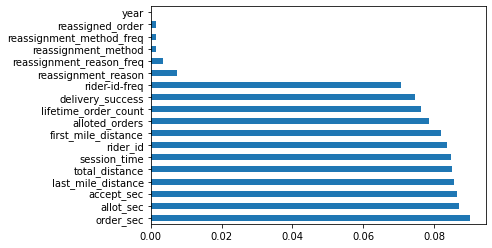

In [71]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(18).plot(kind='barh')
plt.show()

In [72]:
X.columns

Index(['rider_id', 'first_mile_distance', 'last_mile_distance',
       'alloted_orders', 'lifetime_order_count', 'reassignment_method',
       'reassignment_reason', 'reassigned_order', 'session_time', 'accept_sec',
       'order_sec', 'allot_sec', 'year', 'month', 'reassignment_reason_freq',
       'reassignment_method_freq', 'total_distance', 'delivery_success',
       'rider-id-freq'],
      dtype='object')

In [73]:
X = X.drop(['reassignment_reason','reassignment_method_freq','reassignment_method','reassignment_reason_freq','reassigned_order','year'],axis=1)

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [130]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]
print(len(constant_columns))                  

2


In [131]:
X_train = X_train.drop(constant_columns,axis=1)
X_test = X_test.drop(constant_columns,axis=1)

In [132]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

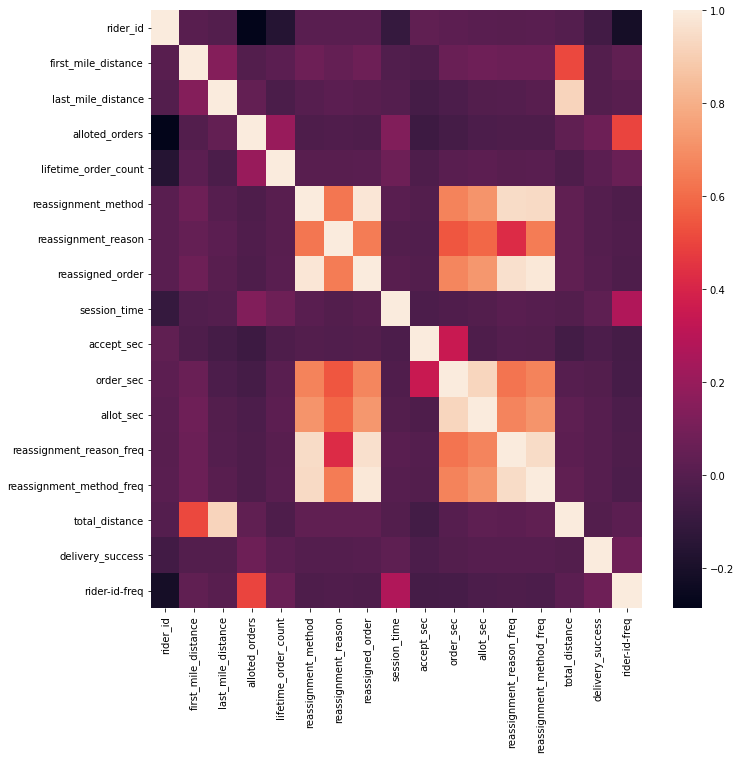

In [133]:
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [134]:
corr_features = correlation(X_train, 0.9)
#len(set(corr_features))
corr_features

{'allot_sec',
 'reassigned_order',
 'reassignment_method_freq',
 'reassignment_reason_freq',
 'total_distance'}

In [81]:
X_tr= X_train.drop(corr_features,axis=1)
X_te= X_test.drop(corr_features,axis=1)

In [82]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_tr1= sc.fit_transform(X_tr)
X_te1 = sc.transform(X_te)

In [83]:

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_tr2= scaler.fit_transform(X_tr)
X_te2= scaler.transform(X_te)

In [84]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

In [136]:
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

In [137]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, preds)

0.5203126510878323

In [89]:
from imblearn.ensemble import BalancedBaggingClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [138]:
from imblearn.ensemble import BalancedBaggingClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
                 

model2 = BalancedBaggingClassifier(base_estimator = RandomForestClassifier())

model2.fit(X_train, y_train)
y_pred_bc = model2.predict(X_test)

print("Training Accuracy: ", model2.score(X_train, y_train))
print('Testing Accuarcy: ', model2.score(X_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_bc)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred_bc)
sns.heatmap(cm, annot = True, cmap = 'Purples')
plt.show()


AttributeError: ignored

In [95]:
y.value_counts()

0.0    42471
1.0      391
Name: cancelled, dtype: int64

In [96]:
frauds = np.array(df[df['cancelled'] == 0].index)
no_frauds = len(frauds)

print(no_frauds)

42471


In [102]:
normal_indices = df[df['cancelled'] == 1]
no_normal_indices = len(normal_indices)

random_normal_indices = np.random.choice(no_normal_indices, size = no_frauds, replace = True)
random_normal_indices = np.array(random_normal_indices)

In [103]:
under_sample = np.concatenate([frauds, random_normal_indices])
print(len(under_sample))

84942


In [106]:
# creating the undersample data

undersample_data = df.iloc[under_sample, :]
x_u = undersample_data.iloc[:, undersample_data.columns != 'cancelled'] 
y_u = undersample_data.iloc[:, undersample_data.columns == 'cancelled']

print(x_u.shape)
print(y_u.shape)

IndexError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_u, y_u, test_size = 0.2, random_state = 0)

print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)

In [139]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_resample(X, y.values.ravel())

print(x_resample.shape)
print(y_resample.shape)

(84942, 19)
(84942,)


In [140]:
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)

(67953, 19)
(67953,)
(16989, 19)
(16989,)


In [151]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.transform(x_test2)

Training Accuracy:  1.0
Testing Accuarcy:  0.992171405026782


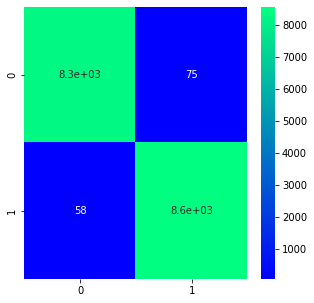

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      8381
         1.0       0.99      0.99      0.99      8608

    accuracy                           0.99     16989
   macro avg       0.99      0.99      0.99     16989
weighted avg       0.99      0.99      0.99     16989



In [152]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_o = RandomForestClassifier()
model_o.fit(x_train2, y_train2)

y_pred = model_o.predict(x_test2)

print("Training Accuracy: ", model_o.score(x_train2, y_train2))
print('Testing Accuarcy: ', model_o.score(x_test2, y_test2))

# confusion matrix
cm = confusion_matrix(y_test2, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.show()

# classification report
cr = classification_report(y_test2, y_pred)
print(cr)

In [158]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test2, y_pred)

0.992156634496775

In [145]:
df_test= df_test.drop(['reassignment_reason','reassignment_method_freq','reassignment_method','reassignment_reason_freq','reassigned_order','year'],axis=1)

KeyError: ignored

In [146]:
df_test= df_test.drop(['order_id'],axis=1)

KeyError: ignored

In [147]:
df_test.isnull().sum()

rider_id                0
first_mile_distance     0
last_mile_distance      0
alloted_orders          0
lifetime_order_count    0
session_time            0
accept_sec              0
order_sec               0
allot_sec               0
month                   0
total_distance          0
delivery_success        0
rider-id-freq           0
dtype: int64

In [118]:
X.columns

Index(['rider_id', 'first_mile_distance', 'last_mile_distance',
       'alloted_orders', 'lifetime_order_count', 'session_time', 'accept_sec',
       'order_sec', 'allot_sec', 'month', 'total_distance', 'delivery_success',
       'rider-id-freq'],
      dtype='object')

In [154]:
X_sub = df_test.iloc[:, :].values

In [155]:
X_sub2 = sc.transform(X_sub)

ValueError: ignored

In [ ]:
for col in df_test.columns:  
    dataTypeSeries = df_test[col].dtypes
    print('Data type of '+ col+ ' column of Dataframe :')
    print(dataTypeSeries)

Data type of first_mile_distance column of Dataframe :
float64
Data type of last_mile_distance column of Dataframe :
float64
Data type of alloted_orders column of Dataframe :
float64
Data type of lifetime_order_count column of Dataframe :
float64
Data type of session_time column of Dataframe :
float64
Data type of accept_sec column of Dataframe :
float64
Data type of order_sec column of Dataframe :
float64
Data type of allot_sec column of Dataframe :
float64
Data type of reassignment_reason_freq column of Dataframe :
int64
Data type of total_distance column of Dataframe :
float64
Data type of rider-id-freq column of Dataframe :
int64
Data type of reassignment_method_freq column of Dataframe :
int64
Data type of reassigned_order column of Dataframe :
float64
Data type of month column of Dataframe :
int64
Data type of delivery_success column of Dataframe :
float64


In [157]:
y_final = model_o.predict(X_sub2)

ValueError: ignored

In [125]:
print(y_final)

[0. 0. 0. ... 0. 0. 0.]


In [126]:
df_submit = pd.DataFrame(y_final, columns = ['cancelled'])
df_submit.to_csv('final.csv', index=False)